In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("CleanData.csv")
print(df.head())


   cough  fever  sore_throat  shortness_of_breath  head_ache  \
0      1      0            0                    0          0   
1      1      1            0                    0          0   
2      0      0            0                    0          0   
3      0      0            0                    0          0   
4      0      0            0                    0          0   

   age_60_and_above  gender  Abroad  Contact  No_activite  corona_result  
0                 0       1       1        0            0              0  
1                 0       1       0        0            1              0  
2                 0       1       0        0            1              1  
3                 0       1       0        0            1              1  
4                 0       1       0        0            1              1  


In [3]:
print(df.shape)
print(df.info())

(47998, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47998 entries, 0 to 47997
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   cough                47998 non-null  int64
 1   fever                47998 non-null  int64
 2   sore_throat          47998 non-null  int64
 3   shortness_of_breath  47998 non-null  int64
 4   head_ache            47998 non-null  int64
 5   age_60_and_above     47998 non-null  int64
 6   gender               47998 non-null  int64
 7   Abroad               47998 non-null  int64
 8   Contact              47998 non-null  int64
 9   No_activite          47998 non-null  int64
 10  corona_result        47998 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB
None


In [4]:
print(df.describe())

              cough         fever   sore_throat  shortness_of_breath  \
count  47998.000000  47998.000000  47998.000000         47998.000000   
mean       0.750740      0.386204      0.039397             0.032189   
std        0.432589      0.486883      0.194541             0.176503   
min        0.000000      0.000000      0.000000             0.000000   
25%        1.000000      0.000000      0.000000             0.000000   
50%        1.000000      0.000000      0.000000             0.000000   
75%        1.000000      1.000000      0.000000             0.000000   
max        1.000000      1.000000      1.000000             1.000000   

          head_ache  age_60_and_above        gender        Abroad  \
count  47998.000000      47998.000000  47998.000000  47998.000000   
mean       0.049523          0.107963      0.638068      0.381828   
std        0.216959          0.310337      0.480564      0.485840   
min        0.000000          0.000000      0.000000      0.000000   
25%   

In [5]:
df=df.drop('Abroad',axis=1)
df=df.drop('Contact',axis=1)
df=df.drop('No_activite',axis=1)

X=df.drop('corona_result',axis=1).values
Y = df['corona_result'].values

print(X.shape)
print(Y.shape)



(47998, 7)
(47998,)


In [6]:
#from sklearn.datasets import make_blobs

#x,y = make_blobs(n_samples=200, centers=2, n_features=3, random_state=0)
#print(x.shape)
#print(y)

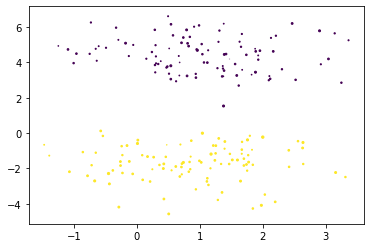

In [36]:
#plt.scatter(x[:,0],x[:,1],x[:,2], c=y)
#plt.show()


In [30]:
#x, y = make_blobs(n_samples=300, centers=2, n_features=3, random_state=0)
#print(x.shape)
#print(y)

#plt.scatter(x[:,0],x[:,1],x[:,2], c=y)
#plt.show()

In [7]:
print(X.shape,Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.3, random_state=42)

#print("done")

(47998, 7) (47998,)


In [11]:
#Model Selection- Linearly Saparable so Model that can be use are : Knn model,Logistic,LinearSVC,SVM 

In [8]:
# SUPPORT VECTOR MACHINE

svm = SVC()  
svm.fit(X_train,Y_train);
print(svm.score(X_train,Y_train))

y_pred = svm.predict(X_test)
print(svm.score(X_test,Y_test))

print(classification_report(Y_test, y_pred))


0.8727305196737901
0.8703472222222223
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     10038
           1       0.90      0.64      0.75      4362

    accuracy                           0.87     14400
   macro avg       0.88      0.81      0.83     14400
weighted avg       0.87      0.87      0.86     14400



In [ ]:

param_grid = {'n_neighbors': np.arange(1,10)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid,cv=5)

#Fitting and Predicting 
knn_cv.fit(X_train, Y_train)

print(knn_cv.best_params_)
knn_cv.best_score_

y_pred= knn_cv.predict(X_test)

print(knn.score(X_test,Y_test))

print(classification_report(Y_test, y_pred))

In [57]:
#Linear Support Vector Classifier

lsvm = LinearSVC()

lsvm.fit(X_train, Y_train)
print(lsvm.score(X_train,Y_train))

y_pred = lsvm.predict(X_test)

print(lsvm.score(X_test,Y_test))

print(classification_report(Y_test, y_pred))

0.820792904339544
0.8218055555555556
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     10038
           1       0.72      0.67      0.70      4362

    accuracy                           0.82     14400
   macro avg       0.79      0.78      0.78     14400
weighted avg       0.82      0.82      0.82     14400



In [54]:
# Logistic Regression -Classification

param_grid = {'C': np.arange(1, 50)}
logreg = LogisticRegression()
lg_cv = GridSearchCV(logreg, param_grid,cv=5)

# Fitting and Predicting 
lg_cv.fit(X_train, Y_train)

print(lg_cv.best_params_)
print(lg_cv.best_score_)



{'C': 1}
0.8234718796731373


In [55]:
# Predicting
y_pred = lg_cv.predict(X_test)

print(y_pred)
print(lg_cv.score(X_train,Y_train))
print(lg_cv.score(X_test,Y_test))
 
print(classification_report(Y_test, y_pred))


[0 0 1 ... 0 0 0]
0.8238287993332937
0.8239583333333333
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     10038
           1       0.72      0.69      0.70      4362

    accuracy                           0.82     14400
   macro avg       0.79      0.79      0.79     14400
weighted avg       0.82      0.82      0.82     14400



[9.99916610e-01 1.98929399e-03 1.30577762e-02 9.99545598e-01
 1.79565995e-03 2.53959679e-05 9.94398005e-01 9.68191153e-01
 2.86402633e-03 6.99269161e-05 9.85742478e-01 5.62257643e-04
 9.99987452e-01 2.28694530e-03 9.97075730e-01 6.33755705e-03
 2.02986997e-04 3.91880180e-01 1.15552431e-02 3.12672298e-05
 9.99061668e-01 1.96047783e-04 9.99949666e-01 1.08344849e-03
 1.92103985e-03 5.45549559e-03 4.04515481e-05 9.99279850e-01
 1.82627782e-03 3.57643041e-03 9.99952659e-01 8.70751146e-04
 9.71125526e-01 9.99719437e-01 1.25811985e-04 9.99886091e-01
 9.98773882e-01 6.67188092e-01 9.98091391e-01 9.99876208e-01
 9.97298258e-03 9.99985198e-01 5.91836716e-03 9.99858363e-01
 9.26182531e-05 4.28778412e-04 8.21235282e-04 1.88216133e-02
 9.66662323e-01 1.97591737e-04 9.99932562e-01 9.88542099e-01
 9.84976608e-01 9.99461443e-01 9.99951286e-01 9.99401428e-01
 9.99810786e-01 9.78131878e-01 2.76000405e-03 1.80209230e-04
 3.26982895e-04 1.83295634e-05 9.99961326e-01 9.99832835e-01
 9.94279342e-01 9.999935

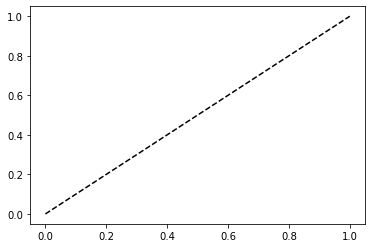

In [17]:
# Fitting and Predicting Probability

logreg.fit(X_train,Y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

print(y_pred_prob)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')


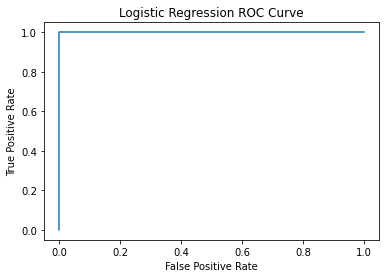

In [56]:
plt.plot(fpr, tpr, label ='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show()

In [ ]:
# Intercept Size
print(svm.coef_)

In [ ]:
# Intercept Size
print(svm.intercept_)